In [1]:
# DATA PREPROCESSING STAGE 

In [335]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
main_df = pd.read_csv("student.csv")

In [336]:
main_df.head(20)
print(len(main_df.columns))

18


In [337]:
main_df.isna().sum()

school         0
sex            0
age           15
address        0
Medu           0
Fedu           0
studytime      0
failures       0
activities     0
nursery        0
higher         0
freetime       0
goout          0
health         0
absences       0
G1             0
G2             0
G3             0
dtype: int64

In [338]:
main_df["age"].value_counts() ##here according to data there are two students with outlier values. (21, 22). 
## So that can deviate the mean by some amount. So we can consider median over mean for this feature to fill the na 
## values

16.0    97
17.0    97
15.0    79
18.0    79
19.0    23
20.0     3
21.0     1
22.0     1
Name: age, dtype: int64

In [339]:
age_mean = main_df['age'].mean()
age_median = main_df['age'].median()

print("mean : ", age_mean)
print("median : ", age_median)

## mean value is less here than median. So there is very little deviation of mean due to outliers. So we use mean to fill the data.

mean :  16.705263157894738
median :  17.0


In [340]:
main_df["age"].fillna(age_mean, inplace = True) ##now we have removed all the na values.

In [341]:
main_df.isna().sum()

school        0
sex           0
age           0
address       0
Medu          0
Fedu          0
studytime     0
failures      0
activities    0
nursery       0
higher        0
freetime      0
goout         0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [342]:
cat_columns = main_df.select_dtypes(exclude=["number","bool_"])
print("Categorial Data : ", cat_columns.columns)


Categorial Data :  Index(['school', 'sex', 'address', 'activities', 'nursery', 'higher'], dtype='object')


In [343]:
print(main_df["school"].unique())
print(main_df["sex"].unique())
print(main_df["address"].unique())
print(main_df["activities"].unique())
print(main_df["nursery"].unique())
print(main_df["higher"].unique())

['GP' 'MS']
['F' 'M']
['U' 'R']
['no' 'yes']
['yes' 'no']
['yes' 'no']


In [344]:
print(main_df["school"].value_counts())
print(main_df["sex"].value_counts())
print(main_df["address"].value_counts())
print(main_df["activities"].value_counts())
print(main_df["nursery"].value_counts())
print(main_df["higher"].value_counts())

GP    349
MS     46
Name: school, dtype: int64
F    208
M    187
Name: sex, dtype: int64
U    307
R     88
Name: address, dtype: int64
yes    201
no     194
Name: activities, dtype: int64
yes    314
no      81
Name: nursery, dtype: int64
yes    375
no      20
Name: higher, dtype: int64


In [345]:
school_encode = pd.get_dummies(main_df.school)
sex_encode = pd.get_dummies(main_df.sex)
address_encode = pd.get_dummies(main_df.address)
activities_encode = pd.get_dummies(main_df.activities)
nursery_encode = pd.get_dummies(main_df.nursery)
higher_encode = pd.get_dummies(main_df.higher)

In [346]:
merged_df = pd.concat([main_df, school_encode, sex_encode, address_encode, activities_encode, nursery_encode, higher_encode], axis = 'columns')

In [347]:
merged_df.columns

Index(['school', 'sex', 'age', 'address', 'Medu', 'Fedu', 'studytime',
       'failures', 'activities', 'nursery', 'higher', 'freetime', 'goout',
       'health', 'absences', 'G1', 'G2', 'G3', 'GP', 'MS', 'F', 'M', 'R', 'U',
       'no', 'yes', 'no', 'yes', 'no', 'yes'],
      dtype='object')

In [348]:
merged_df.drop(['school', 'sex', 'address', 'nursery', 'higher', 'activities', 'F', 'R', 'no', 'no', 'no', 'GP'], axis = 'columns', inplace = True)

In [349]:
cat_columns = merged_df.select_dtypes(exclude=["number","bool_"])
print("Categorial Data : ", cat_columns.columns)

Categorial Data :  Index([], dtype='object')


In [350]:
merged_df.index[merged_df.duplicated()]    #no duplicate rows

Int64Index([], dtype='int64')

In [351]:
main_df = merged_df
X = main_df.drop("G3", axis = "columns")
y = main_df["G3"]
X.count()

age          395
Medu         395
Fedu         395
studytime    395
failures     395
freetime     395
goout        395
health       395
absences     395
G1           395
G2           395
MS           395
M            395
U            395
yes          395
yes          395
yes          395
dtype: int64

In [352]:
                                    # using sklearn

In [353]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [354]:
# from sklearn.linear_model import LinearRegression
# clf = LinearRegression()
# clf.fit(X_train, y_train)

In [355]:
# clf.predict(X_test)

In [356]:
# clf.score(X_test, y_test)

In [357]:
                                    #  a.univariate Regression

In [358]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
main_df = pd.read_csv('student.csv')
main_df.head()

,school,sex,age,address,Medu,Fedu,studytime,failures,activities,nursery,higher,freetime,goout,health,absences,G1,G2,G3
0,GP,F,18.0,U,4,4,2,0,no,yes,yes,3,4,3,6,5,6,6
1,GP,F,17.0,U,1,1,2,0,no,no,yes,3,3,3,4,5,5,6
2,GP,F,15.0,U,1,1,2,3,no,yes,yes,3,2,3,10,7,8,10
3,GP,F,15.0,U,4,2,3,0,yes,yes,yes,2,2,5,2,15,14,15
4,GP,F,16.0,U,3,3,2,0,no,yes,yes,3,2,5,4,6,10,10


In [359]:
corr_matrix = main_df.corr()   #we are checking the correlation matrix to find the relationship between variables. Here G2 has the highest correlation among others so we will pick G2 for now as our independent variable to predict G3
print(corr_matrix)


                age      Medu      Fedu  studytime  failures  freetime  \
age        1.000000 -0.157654 -0.170833  -0.001696  0.239690  0.027574   
Medu      -0.157654  1.000000  0.623455   0.064944 -0.236680  0.030891   
Fedu      -0.170833  0.623455  1.000000  -0.009175 -0.250408 -0.012846   
studytime -0.001696  0.064944 -0.009175   1.000000 -0.173563 -0.143198   
failures   0.239690 -0.236680 -0.250408  -0.173563  1.000000  0.091987   
freetime   0.027574  0.030891 -0.012846  -0.143198  0.091987  1.000000   
goout      0.117736  0.064094  0.043105  -0.063904  0.124561  0.285019   
health    -0.085577 -0.046878  0.014742  -0.075616  0.065827  0.075733   
absences   0.175388  0.100285  0.024473  -0.062700  0.063726 -0.058078   
G1        -0.043231  0.205341  0.190270   0.160612 -0.354718  0.012613   
G2        -0.125728  0.215527  0.164893   0.135880 -0.355896 -0.013777   
G3        -0.148143  0.217147  0.152457   0.097820 -0.360415  0.011307   

              goout    health  absenc

<AxesSubplot:title={'center':'G2 grade VS G3 grade'}, xlabel='G3'>

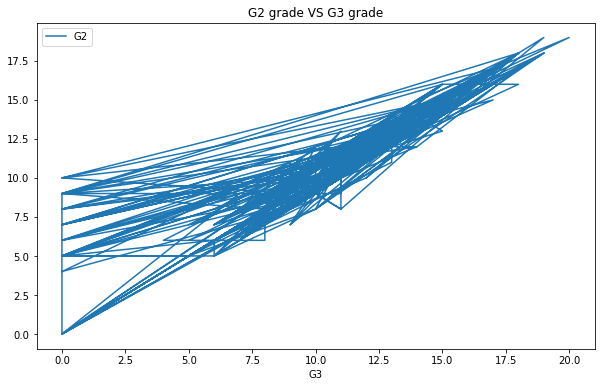

In [360]:
main_df.plot(x='G3', y='G2', kind = 'line', title = 'G2 grade VS G3 grade')

Text(0.5, 1.0, 'Scatter plot of data')

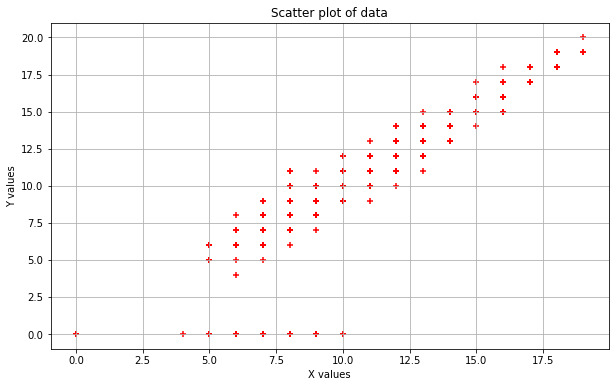

In [361]:
X_u = main_df['G2'].values
y_u = main_df['G3'].values
m = X_u.shape[0]

plt.scatter(X_u,y_u, color='red',marker= '+')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Scatter plot of data')

In [362]:

# main_df = main_df.sample(frac=1)

# # Define a size for your train set 
# train_size = int(0.7 * len(main_df))

# # Split your dataset 
# X_train = X[:train_size]
# X_test = X[train_size:]

# y_train = y[:train_size]
# y_test = y[train_size:]
# print(X_train.shape)
# print(X_test.shape)

# print(y_train.shape)
# print(y_test.shape)




#Lets create a matrix with single column of ones
X_u0 = np.ones((m, 1))
X_u0[:5]


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [363]:
X_u = X_u.reshape(m, 1)
X_u = np.hstack((X_u, X_u0))
X_u[:5]

array([[ 6.,  1.],
       [ 5.,  1.],
       [ 8.,  1.],
       [14.,  1.],
       [10.,  1.]])

In [364]:
theta_u = np.zeros(2)
theta_u.shape

(2,)

In [365]:
def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)

    return J

In [366]:
X_u.shape
cost_u = compute_cost(X_u, y_u, theta_u)
print('The cost for given values of theta_0 and theta_1 =', cost_u)

The cost for given values of theta_0 and theta_1 = 64.70632911392406


In [367]:
def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = []
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history.append(compute_cost(X, y, theta)) 
    return theta, cost_history

In [368]:
theta = [5., 5.]
iterations = 1500;
alpha = 0.01;

In [369]:
theta_u, cost_history = gradient_descent(X_u, y_u, theta_u, alpha, iterations)
print('Final value of theta =', theta_u)
print('cost_history =', cost_history)

Final value of theta = [ 1.07813012 -1.10446676]
cost_history = [7.580075699319531, 2.509343810305471, 2.059033682688634, 2.018830318158447, 2.015028327224565, 2.014457811095136, 2.0141746255526276, 2.013917448773311, 2.01366308486824, 2.0134094738860533, 2.013156431892688, 2.012903941470792, 2.012651999985321, 2.012400606115668, 2.012149758660256, 2.0118994564304313, 2.011649698241038, 2.0114004829095786, 2.011151809256131, 2.0109036761033408, 2.0106560822764097, 2.0104090266030963, 2.010162507913704, 2.0099165250410813, 2.0096710768206116, 2.00942616209021, 2.009181779690318, 2.0089379284638964, 2.0086946072564222, 2.0084518149158814, 2.0082095502927637, 2.0079678122400564, 2.007726599613241, 2.0074859112702876, 2.0072457460716464, 2.0070061028802453, 2.006766980561484, 2.0065283779832286, 2.006290294015804, 2.0060527275319933, 2.005815677407028, 2.005579142518584, 2.0053431217467774, 2.005107613974158, 2.0048726180857064, 2.0046381329688217, 2.0044041575133265, 2.004170690611455, 2.

In [370]:
                                            #multi-variate

In [371]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
main_df = pd.read_csv("student.csv")

num_columns = len(main_df.columns)
X_col = main_df[['G1','G2']]    #Taking G1, G2 because they have high correlation value with G3
y_col = main_df[["G3"]]
print(X_col.columns)
print(y_col.columns)



Index(['G1', 'G2'], dtype='object')
Index(['G3'], dtype='object')


In [372]:
X_col.columns


Index(['G1', 'G2'], dtype='object')

In [373]:
m = len(X_col)
n = len(X_col.columns)
X_0 = np.ones((m, 1))
X = np.hstack((X_col, X_0))
print(X)
              
theta_m = np.zeros(3)
theta_m = theta_m.reshape((3, 1))
print("theta: ", theta_m.shape)
print("X: ", X.shape)
print("y: ", y_col.shape)



[[ 5.  6.  1.]
 [ 5.  5.  1.]
 [ 7.  8.  1.]
 ...
 [10.  8.  1.]
 [11. 12.  1.]
 [ 8.  9.  1.]]
theta:  (3, 1)
X:  (395, 3)
y:  (395, 1)


In [374]:
def mse(X, y, theta_m):
    predictions = X.dot(theta_m)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)

    return J

In [375]:
cost = mse(X, y_col, theta_m)
print('The cost for given values of theta_0 and theta_1 =', cost)

The cost for given values of theta_0 and theta_1 = G3    64.706329
dtype: float64


In [376]:
def gradient_descent(X, y, theta_m, alpha, iterations):
    cost_history = []
    for i in range(iterations):
        predictions = X.dot(theta_m)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta_m = theta_m - sum_delta;
        cost_history.append(mse(X, y, theta_m)) 
    return theta_m, cost_history

In [377]:
iterations = 2000;
alpha = 0.0001;
theta_m = np.zeros(3)
theta_m = theta_m.reshape(3, 1)
theta_m, cost_history = gradient_descent(X, y_col, theta_m, alpha, iterations)
print('Final value of theta =', theta_m)
print('cost_history =', cost_history)

Final value of theta = [[ 0.33546997]
 [ 0.64963106]
 [-0.00182071]]
cost_history = [G3    61.538424
dtype: float64, G3    58.53177
dtype: float64, G3    55.678159
dtype: float64, G3    52.9698
dtype: float64, G3    50.399299
dtype: float64, G3    47.959639
dtype: float64, G3    45.644159
dtype: float64, G3    43.446538
dtype: float64, G3    41.360776
dtype: float64, G3    39.381179
dtype: float64, G3    37.502343
dtype: float64, G3    35.719139
dtype: float64, G3    34.026699
dtype: float64, G3    32.420402
dtype: float64, G3    30.895863
dtype: float64, G3    29.448921
dtype: float64, G3    28.075625
dtype: float64, G3    26.772227
dtype: float64, G3    25.535168
dtype: float64, G3    24.361071
dtype: float64, G3    23.246732
dtype: float64, G3    22.189108
dtype: float64, G3    21.185313
dtype: float64, G3    20.232606
dtype: float64, G3    19.328386
dtype: float64, G3    18.470186
dtype: float64, G3    17.655663
dtype: float64, G3    16.882593
dtype: float64, G3    16.148867
dtype:

dtype: float64]


Text(0.5, 1.0, 'Convergence of gradient descent')

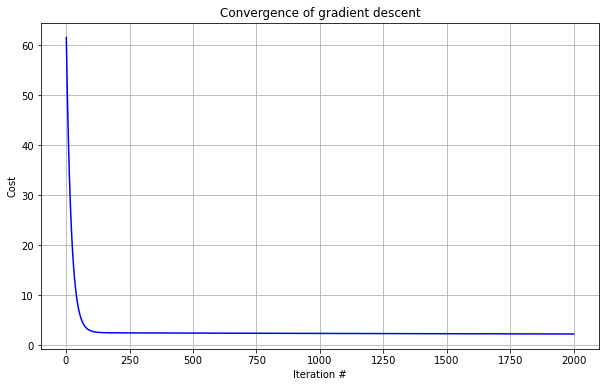

In [378]:
import matplotlib.pyplot as plt
plt.plot(range(1, iterations +1), cost_history, color ='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Iteration #")
plt.ylabel("Cost")
plt.title("Convergence of gradient descent")



In [379]:
               #Pending task : have to plot graph for multivariate :(                     